This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data derived from zip area codes. The data was collected to answer the following question: Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?
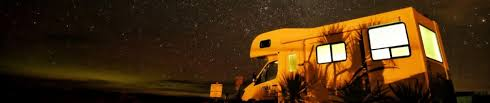

In this kernel, i have not explained data. But you can explore data here, https://www.kaggle.com/uciml/caravan-insurance-challenge/Data

### On the other hand, In this kernel, i have tried to make a recommendation system by using same dataset.So, this system would answer: what are the other products which can be recommended to existing customer ? 
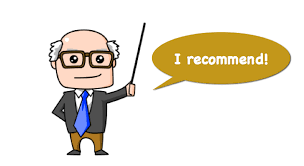

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### Importing Libraries and reading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

dataset = pd.read_csv('/kaggle/input/caravan-insurance-challenge/caravan-insurance-challenge.csv')

### Plotting correlation graph to understand collinearity among features.

In [ ]:
#Correlation
corr = dataset.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})    .set_caption("Hover to magify")    .set_precision(2)    .set_table_styles(magnify())

### Removing features which are highly correlated. Here,threshold is 0.70

In [ ]:
#$MOSHOOFD/MOSTYPE, $MFWEKIND/MGEMOMV, $MRELOV/ MFALLEEN, MGODGE/ $MGODPR, $MRELOV/MRELGE, MOPLLAAG/$MOPLMIDD, $MOPLHOOG/MSKA, $MAUT0/MAUT1, 

#PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND

dataset1 = dataset.drop(['MOSHOOFD','MFWEKIND','MRELOV','MGODPR','MRELOV','MOPLMIDD','MOPLHOOG','MAUT0','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND'],axis=1)


### Plotting histogram to know more about distribution of each feature

In [ ]:
#Histograms
dataset1.hist(figsize=(16,12));

### Removing Features with Single class. Because they dont have much impact on result.

In [ ]:
# ABESAUT, AGEZONG, AINBOED, APERSONG, APLEZIER, AVRAAUT, AWAOREG, AWERKT, AZEILPL
dataset2 = dataset1.drop(['ABESAUT', 'AGEZONG', 'AINBOED', 'APERSONG', 'APLEZIER', 'AVRAAUT', 'AWAOREG', 'AWERKT', 'AZEILPL'],axis=1)
dataset2.head()

In [ ]:
#This column states which rows should be used for training and testing. But, We don't need this column as our ploblem is unsupervised.
dataset2.drop('ORIGIN',axis=1,inplace=True)

In [ ]:
df = pd.get_dummies(data=dataset2, columns=['MOSTYPE'])
df.head()

### Using Cosine Similarity to find similar kind of users.

In [ ]:
user_similarity = pairwise_distances(df, metric='cosine')
user_similarity.shape

In [ ]:
#List of Policies, which we can recommend.
policiescolumnlist = ['AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'AMOTSCO','AAANHANG', 'ATRACTOR','ABROM', 'ALEVEN','ABRAND','AFIETS', 'ABYSTAND', 'CARAVAN']


### Taking example of user having index 0.

In [ ]:
user_index=0

#extracting the list of policies which current user doesn't have
availablecollist=[]
for item in policiescolumnlist:
    if df.loc[user_index,item]==0:
        availablecollist.append(item)

# Methodology :
### Here,we are going to find top 10 similar users and will recommend product. accordingly.
### We have fixed minimum number of policy 3. So if it doesn't get min 3 policy from top 10 similar users, Then it will go for next 10 similar users.
### This code will check upto 200 similar user to get min no of products for recommendation.
### But If it still does not able to find any product, then it will give msg "There are no products, as per top 200 similar people".

In [ ]:
no_of_policies=3 #you can set this variable value as min number of policies you want to recommend.
output=dict()
i=1
while i < 20:
    opdf=df.iloc[user_similarity[user_index].argsort()[(i-1)*10:i*10], 35:48] #list of indexes of row
    tempoutput=dict(opdf[availablecollist].sum().sort_values()[opdf[availablecollist].sum().sort_values()>0])
    output.update(tempoutput)
    if len(output)>=no_of_policies:
        break
    i+=1
    if i>50:
        print("There are no products, as per top 200 similar people")
        break
output

# Result :
### Above 4 are the recommended products for user with index 0. And number mentioned in front of them can be taken as weightage for each product. 
### For e.g :- There are more chances that user will purchase 'AWAPART' product than other products.